<font size="10">Machine Learning</font>

    This is from the Udacity course 'Intro to TensorFlow for Deep Learning'.

    


To do:
- [x] learn the basics of machine learning
- [ ] learn the basics of Huggingface platform

<font size="5">Glossary</font>


| Technical Term |Definition|
| -----------|-----------|
|Activation function|A function that does non-linear transformations to the inputs which makes the neural network capable to learn and perform complex tasks.|
|Adam|Adam is an optimization algorithm that provides more efficient neural neuwork weights by running repeated cycles of "adaptive moment estimation".|
|Backward pass (backpropagation) | Calculation of internal variable adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.|
|Batch|A set of examples used during training of a neural network.|
|Classification|A model that outputs a probability distribution across several categories.|
|CNN|Convolutional Neural Network, a network which has at least one convolutional layer (A typical CNN also includes other types of layers, such as pooling and dense layers).|
|Convolution|The process of applying a kernel (filter) to an image.|
|Dense and fully Connected (FC)|Each node in one layer is connected to each node in the previous layer.|
|Downsampling|The act of reducing the size of an image.|
|Epoch|A full pass over the entire training dataset.|
|Example|A pair of inputs/outputs used during training, for example a pair of values from celsius and fahrenheit at a specific index, such as (22,72).|
|Feature|The input(s) to a model, for example degrees Celsius.|
|Flattening|The process of converting a 2d image into 1d vector.|
|Forward pass|The computation of output values from input.|
|Gradient descent|An algorithm that changes the internal variables a bit at a time to gradually reduce the loss function.|
|Kernel / filter|A matrix which is smaller than the input, used to transform the input into chunks.|
|Labels|The output a model predicts, for example degrees Fahrenheit.|
|Layer|A collection of nodes connected together within a neural network.|
|Learning rate|The “step size” for loss improvement during gradient descent.|
|Loss|The discrepancy between the desired output and the actual output.|
|Loss function|A way of measuring how far off predictions are from the desired outcome.|
|Maxpooling|A pooling process in which many values are converted into a single value by taking the maximum value from among them.|
|Model|The representation of a neural network.|
|MSE|Mean squared error, a type of loss function that counts a small number of large discrepancies as worse than a large number of small ones.|
|Non-linear Activation Function|Activation function that is used for backpropagation and updating the weights during training|
|Optimizer|A specific implementation of the gradient descent algorithm.|
|Optimizer function|A way of adjusting internal values in order to reduce the loss.|
|Padding|Adding pixels of some value, usually 0, around the input image.|
|Pooling|The process of reducing the size of an image through downsampling (average / maxpooling).|
|Regression|A model that outputs a single value.|
|ReLU (Rectified Linear Unit)|An activation function that allows a model to solve nonlinear problems.|
|Softmax|A function that provides probabilities for each possible output class.|
|Stride|The number of pixels to slide the kernel across the image.|
|Training set|The data used for training a neural network.|
|Test set|The data used for testing the final performance of our neural network.|
|Weights and biases|The internal variables of a model.|


# Activation Functions

    1. ReLU (Rectified Linear Unit)
                                R(x) = max(0,x)

    - ReLU is the most used one because of general better results.
    - In case of dead neurons with ReLU, Leaky ReLU or ELU can be used instead.



    2. Sigmoid
                                σ(x) = (𝓮ˣ)/(1+𝓮ˣ)
    - range = [0,1]
    - not zero-centered



    3. Tanh
                                tanh(x) = (𝓮ˣ-𝓮̄ˣ)/(𝓮ˣ+𝓮̄ˣ)
    - range = [-1,1]
    - zero-centered



    4. Linear

- Sigmoid works good for classification problems
- Sigmoid and tanh


<font size="5">Regression Model</font>

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit
Finished training the model
1/1 [==============================] - 0s 304ms/step
[[211.33475]]
These are the layer variables: [array([[1.8210492]], dtype=float32), array([29.229826], dtype=float32)]


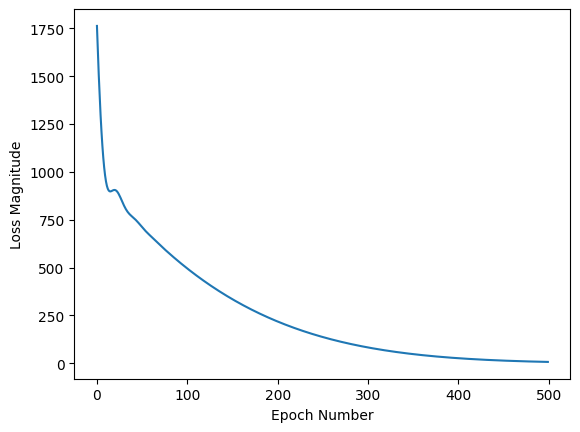

In [1]:
# Import TensorFlow and helper libraries
import tensorflow as tf
import numpy as np
import logging
import matplotlib.pyplot as plt

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Input and output data
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

l0 = tf.keras.layers.Dense(units=1, input_shape=[1])                              # create dense layers
model = tf.keras.Sequential([l0])                                                 # create a Sequential model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1)) # configure the model
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)           # train the model

print("Finished training the model")
print(model.predict([100.0]))
print("These are the layer variables: {}".format(l0.get_weights()))

 # Plot
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

<font size="5">Image Classification with a Convolutional Neural Network (CNN)</font>



In [ ]:
import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# import dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

predictions.shape
predictions[0]
np.argmax(predictions[0])

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# **Markdown Cheatsheet**


| Syntax      | Description |
| ----------- | ----------- |
| Header      | Title       |
| Paragraph   | Text        |

<font color="red"><font size="2">test</font>

~The world is flat.~



- [x] bullet point one
- [ ] bullet point two
- [ ] bullet point three


    asd